# **Two  way ANOVA**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# craete a data set
df=pd.DataFrame({'water':np.repeat(['daily','weakly'],15),
                 'sun':np.tile(np.repeat(["low",'medium','high'],5),2),
                 'height':[6,4,5,6,6,5,3,4,5,6,
                           6,5,5,6,4,5,8,7,5,7,
                           6,2,6,2,6,5,3,7,5,6]})
print(df)

     water     sun  height
0    daily     low       6
1    daily     low       4
2    daily     low       5
3    daily     low       6
4    daily     low       6
5    daily  medium       5
6    daily  medium       3
7    daily  medium       4
8    daily  medium       5
9    daily  medium       6
10   daily    high       6
11   daily    high       5
12   daily    high       5
13   daily    high       6
14   daily    high       4
15  weakly     low       5
16  weakly     low       8
17  weakly     low       7
18  weakly     low       5
19  weakly     low       7
20  weakly  medium       6
21  weakly  medium       2
22  weakly  medium       6
23  weakly  medium       2
24  weakly  medium       6
25  weakly    high       5
26  weakly    high       3
27  weakly    high       7
28  weakly    high       5
29  weakly    high       6


<AxesSubplot:xlabel='sun', ylabel='height'>

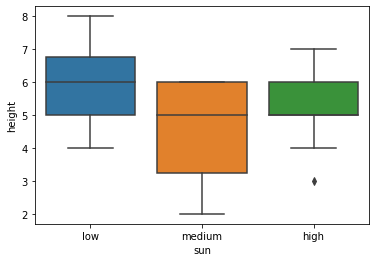

In [4]:
sns.boxplot(x='sun',y='height',data=df)

<AxesSubplot:xlabel='sun', ylabel='height'>

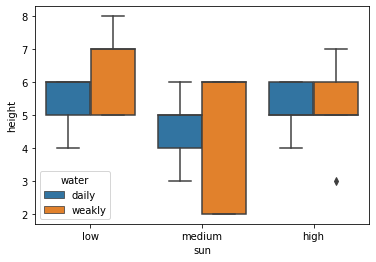

In [5]:
sns.boxplot(x='sun',y='height',data=df,hue='water') # there are two variables so we use two way anova

In [6]:
# stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
# ONE WAY ANOVA
mod=ols('height~sun',data=df).fit()
ano_table=sm.stats.anova_lm(mod,type=2)
print(ano_table)

            df  sum_sq   mean_sq    F   PR(>F)
sun        2.0     9.8  4.900000  2.7  0.08532
Residual  27.0    49.0  1.814815  NaN      NaN


In [8]:
# TWO WAY ANOVA
mod=ols('height~ C(sun)+C(water)+C(sun):C(water)',data=df).fit()
ano_table=sm.stats.anova_lm(mod,type=2)
print(ano_table)

                   df     sum_sq   mean_sq         F    PR(>F)
C(sun)            2.0   9.800000  4.900000  2.534483  0.100318
C(water)          1.0   0.533333  0.533333  0.275862  0.604245
C(sun):C(water)   2.0   2.066667  1.033333  0.534483  0.592786
Residual         24.0  46.400000  1.933333       NaN       NaN


### |---> there is significant difference between (sun and water) and height

In [9]:
# Another way to doing 2 way anova
# tucky test
import pingouin as pg
# first calculate anova table
aov=pg.anova(data=df,dv='height',between=['sun','water'],detailed=True)
print(aov)

        Source         SS  DF        MS         F     p-unc       np2
0          sun   9.800000   2  4.900000  2.534483  0.100318  0.174377
1        water   0.533333   1  0.533333  0.275862  0.604245  0.011364
2  sun * water   2.066667   2  1.033333  0.534483  0.592786  0.042641
3     Residual  46.400000  24  1.933333       NaN       NaN       NaN


In [41]:
 # tucky test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tucky=pairwise_tukeyhsd(df['height'],df['sun'],alpha=0.05)
print(tucky)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  high    low      0.7 0.4855 -0.7938 2.1938  False
  high medium     -0.7 0.4855 -2.1938 0.7938  False
   low medium     -1.4 0.0694 -2.8938 0.0938  False
---------------------------------------------------


<AxesSubplot:xlabel='sun', ylabel='height'>

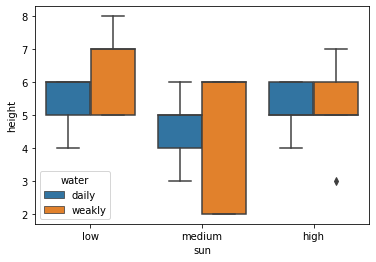

In [42]:
sns.boxplot(x='sun',y='height',data=df,hue='water')

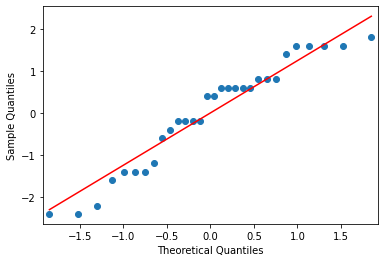

In [43]:
# QQ-norm plot 
res=mod.resid
fig=sm.qqplot(res,line='s')
plt.show()  # QQ-norm plot